In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
import statistics 
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import dataset
Raw_data = pd.read_csv("InterDate/clean_var.csv")
# Raw_data.tail()
mydata = Raw_data.loc[:,Raw_data.sum(axis=0)>7]

In [3]:
# Under-sampling and data splitting (train and 'test' dataset)
X = mydata[mydata.columns.difference(['lnctDNA'])]
y = mydata.loc[:, 'lnctDNA']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6, random_state=3121)

#### Exploratory analysis with linear regression

In [ ]:
# Create linear regression object
regr = linear_model.Ridge(alpha=18)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_tpred = regr.predict(X_train)

In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_tpred))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

In [ ]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Formal analysis with random forest

In [3]:
MSE_train_list = list()
MSE_test_list = list()
df = pd.DataFrame(columns=sorted(mydata.columns.drop('lnctDNA')))

random.seed(31)
for i in range(1000):
    # Under-sampling and data splitting (train and 'test' dataset)
    X = mydata[mydata.columns.difference(['lnctDNA'])]
    y = mydata.loc[:, 'lnctDNA']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6, random_state=3133)


    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with 200 decision trees
    # Tuning on min_samples_leaf an max_depth help a lot
    rf = RandomForestRegressor(n_estimators = 100, 
                           max_features = 5,
                           max_depth=3, # default is None
                           random_state = random.randint(1,100000))
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Actual class predictions
    y_pred = rf.predict(X_test)
    y_train_pred = rf.predict(X_train)

    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_train, y_train_pred))
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    
    MSE_train_list.append(mean_squared_error(y_train, y_train_pred))
    MSE_test_list.append(mean_squared_error(y_test, y_pred))
    
    # obtain shap value
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_test)
    df.loc[i]=(abs(shap_values).mean(axis=0))

Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.26
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.26
Mean squared error: 1.42


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.29
Mean squared error: 1.19
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.38
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.34
Mean squared error: 1.25
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.35
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.35
Mean squared error: 1.17
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.35
Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.30
Mean squared error: 1.30
Mean squared error: 1.16
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.26
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.27
Mean squared error: 1.18
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.19
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.35
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.29
Mean squared error: 1.28
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.38
Mean squared error: 1.26
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.25
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.39
Mean squared error: 1.25
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.29
Mean squared error: 1.26
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.22
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.19
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.27
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.35
Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.39
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.30
Mean squared error: 1.17
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.24
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.22
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.29
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.17
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.28
Mean squared error: 1.18
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.28
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.35
Mean squared error: 1.28
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.35
Mean squared error: 1.20
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.16
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.33
Mean squared error: 1.26
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.34
Mean squared error: 1.26
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.27
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.36
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.17
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.37
Mean squared error: 1.17
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.30
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.33
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.26
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.39
Mean squared error: 1.21
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.20
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.16
Mean squared error: 1.27
Mean squared error: 1.21
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.35
Mean squared error: 1.26
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.32
Mean squared error: 1.19
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.19
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.26
Mean squared error: 1.24
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.36
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.27
Mean squared error: 1.28
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.31
Mean squared error: 1.18
Mean squared error: 1.38


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.36
Mean squared error: 1.18
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.32
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.35
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.27
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.34
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.25
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.36
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.16
Mean squared error: 1.37
Mean squared error: 1.22
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.29
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.27
Mean squared error: 1.27
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.34
Mean squared error: 1.18
Mean squared error: 1.39


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.27
Mean squared error: 1.21
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.30
Mean squared error: 1.28
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.36
Mean squared error: 1.23
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.30
Mean squared error: 1.26
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.26
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.21
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.19
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.32
Mean squared error: 1.19
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.36
Mean squared error: 1.25
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.25
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.31
Mean squared error: 1.30
Mean squared error: 1.25
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.33
Mean squared error: 1.26
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.33
Mean squared error: 1.19
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.25
Mean squared error: 1.26
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.36
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.33
Mean squared error: 1.19
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.33
Mean squared error: 1.19
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.28
Mean squared error: 1.20
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.28
Mean squared error: 1.19
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.28
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.30
Mean squared error: 1.23
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.36
Mean squared error: 1.19
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.36
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.26
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.20
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.30
Mean squared error: 1.25
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.26
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.31
Mean squared error: 1.17
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.27
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.27
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.20
Mean squared error: 1.38


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.26
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.42


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.33
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.20
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.26
Mean squared error: 1.24
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.25
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.27
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.38
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.14
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.21
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.17
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.28
Mean squared error: 1.18
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.17
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.36
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.29
Mean squared error: 1.34
Mean squared error: 1.20
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.38


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.18
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.27
Mean squared error: 1.24
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.20
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.27
Mean squared error: 1.25
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.35
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.31
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.26
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.25
Mean squared error: 1.27
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.35
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.39
Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.32
Mean squared error: 1.28
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.25
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.34
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.29
Mean squared error: 1.17
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30
Mean squared error: 1.27
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.36
Mean squared error: 1.20
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.35
Mean squared error: 1.26
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.26
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.26
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.26
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.25
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.26
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.17
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.37
Mean squared error: 1.16
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.27
Mean squared error: 1.27
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.37
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.20
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.27
Mean squared error: 1.24
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.26
Mean squared error: 1.23
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.33
Mean squared error: 1.28
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.37
Mean squared error: 1.19
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.35
Mean squared error: 1.25
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.30
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.21
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.30
Mean squared error: 1.19
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.23
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.27
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.16
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.27
Mean squared error: 1.27
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.35
Mean squared error: 1.26
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.27
Mean squared error: 1.21
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.15
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.32
Mean squared error: 1.29
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.24
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.18
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.36
Mean squared error: 1.27
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.32
Mean squared error: 1.19
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.18
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.17
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.28
Mean squared error: 1.29
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.28
Mean squared error: 1.20
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.31
Mean squared error: 1.18
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.37
Mean squared error: 1.27
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.19
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.34
Mean squared error: 1.19
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.19
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.38
Mean squared error: 1.23
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.27
Mean squared error: 1.24
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.19
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.32
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.33
Mean squared error: 1.25
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.36
Mean squared error: 1.23
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.38
Mean squared error: 1.24
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.27
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.38
Mean squared error: 1.19
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.33
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.32
Mean squared error: 1.27
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.31
Mean squared error: 1.26
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.20
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.21
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.17
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.26
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.27
Mean squared error: 1.20
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.25
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.37
Mean squared error: 1.25
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.17
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.35
Mean squared error: 1.22
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.28
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.35
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.27
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.24
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.33
Mean squared error: 1.24
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30
Mean squared error: 1.26
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.32
Mean squared error: 1.24
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.33
Mean squared error: 1.25
Mean squared error: 1.36


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.38
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.29
Mean squared error: 1.26
Mean squared error: 1.22
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.32
Mean squared error: 1.21
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.17
Mean squared error: 1.33
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.27
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.31
Mean squared error: 1.20
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.24
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.25
Mean squared error: 1.22
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.26
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.27
Mean squared error: 1.16
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.30
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.29
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.30
Mean squared error: 1.19
Mean squared error: 1.25


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.31
Mean squared error: 1.26
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.30
Mean squared error: 1.24
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.36
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.31
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.29
Mean squared error: 1.26
Mean squared error: 1.37


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.37
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.17
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30
Mean squared error: 1.20
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.26
Mean squared error: 1.23
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.33
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.21
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.34
Mean squared error: 1.19
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.31
Mean squared error: 1.25
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.26
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.37
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.25
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.29
Mean squared error: 1.20
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.35
Mean squared error: 1.21
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.27
Mean squared error: 1.20
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.33
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.27
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.29
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.27
Mean squared error: 1.30
Mean squared error: 1.16
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.35
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.25
Mean squared error: 1.23
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.34
Mean squared error: 1.17
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.23
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.30
Mean squared error: 1.25
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.29
Mean squared error: 1.26
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.26
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.32
Mean squared error: 1.22
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.24
Mean squared error: 1.24


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30
Mean squared error: 1.18
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.40
Mean squared error: 1.23
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.35
Mean squared error: 1.20
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.30
Mean squared error: 1.19
Mean squared error: 1.35


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.26


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.27
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.20
Mean squared error: 1.29
Mean squared error: 1.22
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.26
Mean squared error: 1.21
Mean squared error: 1.33


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.35
Mean squared error: 1.25
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.20
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.30
Mean squared error: 1.21
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.26
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.32
Mean squared error: 1.25
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.34
Mean squared error: 1.19
Mean squared error: 1.40


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.33
Mean squared error: 1.28
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.27
Mean squared error: 1.22
Mean squared error: 1.29


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.24
Mean squared error: 1.35
Mean squared error: 1.20
Mean squared error: 1.27


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.25
Mean squared error: 1.27
Mean squared error: 1.26
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.33
Mean squared error: 1.19
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.18
Mean squared error: 1.24
Mean squared error: 1.24
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.21
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.26
Mean squared error: 1.33
Mean squared error: 1.20
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.19
Mean squared error: 1.31
Mean squared error: 1.23
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.21
Mean squared error: 1.29
Mean squared error: 1.23
Mean squared error: 1.28


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.25
Mean squared error: 1.22
Mean squared error: 1.34


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.22
Mean squared error: 1.28
Mean squared error: 1.24
Mean squared error: 1.30


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.34
Mean squared error: 1.20
Mean squared error: 1.32


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.23
Mean squared error: 1.31
Mean squared error: 1.18
Mean squared error: 1.38


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Mean squared error: 1.28
Mean squared error: 1.31


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [4]:
print('MSE average(train):',sum(MSE_train_list)/len(MSE_train_list))
print('MSE average(test):',sum(MSE_test_list)/len(MSE_test_list))
print('MSE stdev(train):',statistics.stdev(MSE_train_list))
print('MSE stdev(test):',statistics.stdev(MSE_test_list))

MSE average(train): 1.2254065662057445
MSE average(test): 1.3105501348078208
MSE stdev(train): 0.027506853819479895
MSE stdev(test): 0.029504369649827996


In [14]:
MSE_average

,Dataset,MSE
0,train,1.196201
1,train,1.255758
2,train,1.242920
3,train,1.264365
4,train,1.211995
...,...,...
1995,test,1.341621
1996,test,1.318775
1997,test,1.305003
1998,test,1.378237


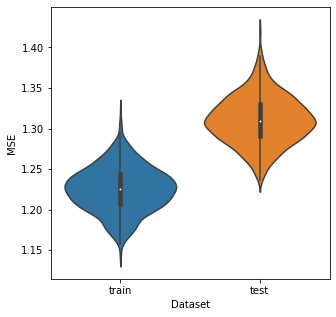

In [17]:
MSE_average = pd.DataFrame({'train':MSE_train_list,'test':MSE_test_list}).melt(var_name='Dataset', value_name='MSE')
plt.figure(figsize=(5,5))
ax = sns.violinplot(y="MSE", x="Dataset", scale="width",data=MSE_average)
plt.savefig("MSE.pdf")

In [18]:
col_order = df.mean().sort_values(ascending=False).index
melted = df.melt(var_name='groups', value_name='vals')
melted['groups'] = pd.Categorical(melted['groups'], categories=col_order, ordered=True)
melted_sort = melted.sort_values('groups')
melted_sort.rename(columns={"groups": "Gene mutation", "vals": "Feature importance in |SHAP| value"},inplace=True)

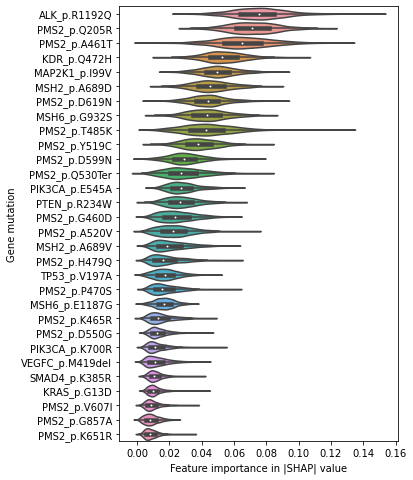

In [23]:
plt.figure(figsize=(5,8))
ax = sns.violinplot(y="Gene mutation", x="Feature importance in |SHAP| value", scale="width",data=melted_sort)
plt.savefig("SHAP.pdf",dpi=199,bbox_inches='tight')
